In [3]:
import os
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

In [4]:
root_path = "../../Data/Experiment_3"

In [11]:
noises = {p.split("/")[-1].split(".")[0].split("_")[-1]: np.load(p) for p in glob(os.path.join(root_path, "*npy")) if "background" not in p}
for k,v in noises.items(): print(f"{k}: {v.shape}")

3: (10, 40, 256, 256, 3)
12: (10, 40, 256, 256, 3)
a: (10, 40, 256, 256, 3)
6: (10, 40, 256, 256, 3)


In [13]:
bgs = {p.split("/")[-1].split(".")[0].split("_")[-1]: np.load(p) for p in glob(os.path.join(root_path, "*npy")) if "background" in p}
for k,v in bgs.items(): print(f"{k}: {v.shape}")

a: (256, 256, 3)
6: (256, 256, 3)
3: (256, 256, 3)
12: (256, 256, 3)


In [48]:
freqs = np.load(os.path.join(root_path, "freqs.npy"))
freqs

array([ 0.1       ,  0.86666667,  1.63333333,  2.4       ,  3.16666667,
        3.93333333,  4.7       ,  5.46666667,  6.23333333,  7.        ,
        7.76666667,  8.53333333,  9.3       , 10.06666667, 10.83333333,
       11.6       , 12.36666667, 13.13333333, 13.9       , 14.66666667,
       15.43333333, 16.2       , 16.96666667, 17.73333333, 18.5       ,
       19.26666667, 20.03333333, 20.8       , 21.56666667, 22.33333333,
       23.1       , 23.86666667, 24.63333333, 25.4       , 26.16666667,
       26.93333333, 27.7       , 28.46666667, 29.23333333, 30.        ])

In [14]:
def model(img):
    return img
def calculate_diffs(img1, img2):
    a, b = model(img1), model(img2)
    return ((a-b)**2).mean(axis=(1,2,3))**(1/2)

In [45]:
diffs = {}
for k, noise in noises.items():
    bg = bgs[k][None,...]
    diffs_it = []
    for noise_it in noise:
        diff = calculate_diffs(noise_it, bg)
        # print(noise_it.shape, bg.shape, diff.shape)
        diffs_it.append(diff)
        # break
    diffs_it = np.array(diffs_it)
    diffs[k] = diffs_it.mean(axis=0)
    # break

In [46]:
diffs_a = diffs.pop("a")
diffs_inv = {k:v/diffs_a for k, v in diffs.items()}

/var/folders/fj/7ttqfxt94c5cqdh00xr61t880000gn/T/ipykernel_84833/167548782.py:2: RuntimeWarning: divide by zero encountered in divide
  diffs_inv = {k:v/diffs_a for k, v in diffs.items()}


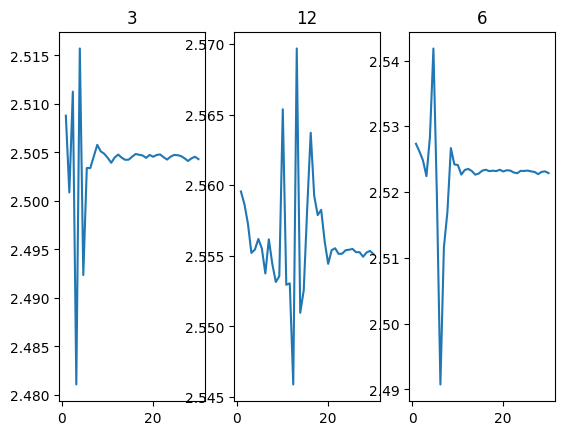

In [49]:
fig, axes = plt.subplots(1,len(diffs_inv))
for ax, (k, diff) in zip(axes.ravel(), diffs_inv.items()):
    ax.plot(freqs, diff)
    ax.set_title(k)
plt.show()